In [2]:
import re
import cv2 
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt

In [3]:

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

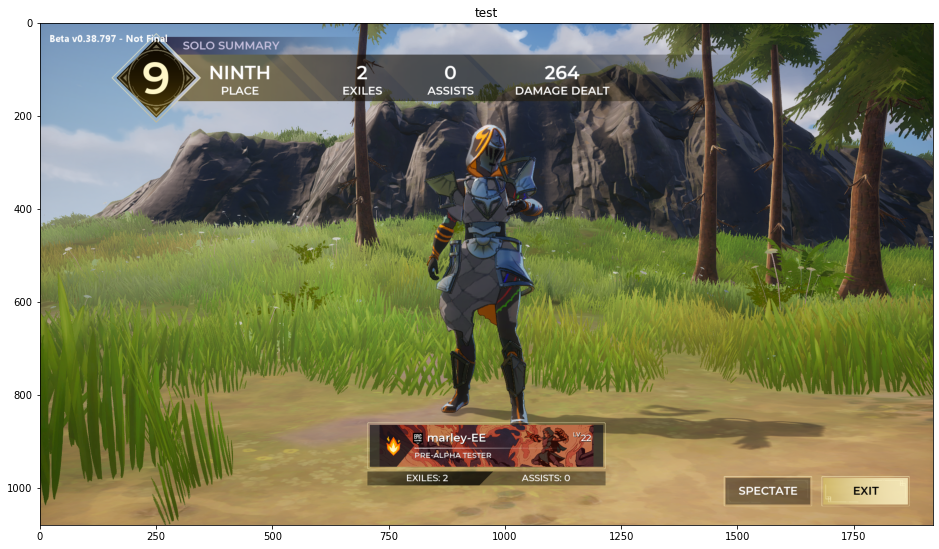

In [4]:
image = cv2.imread('another.png')
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('test')
plt.show()

In [5]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
images = {'gray': gray, 
          'thresh': thresh, 
          'opening': opening, 
          'canny': canny}

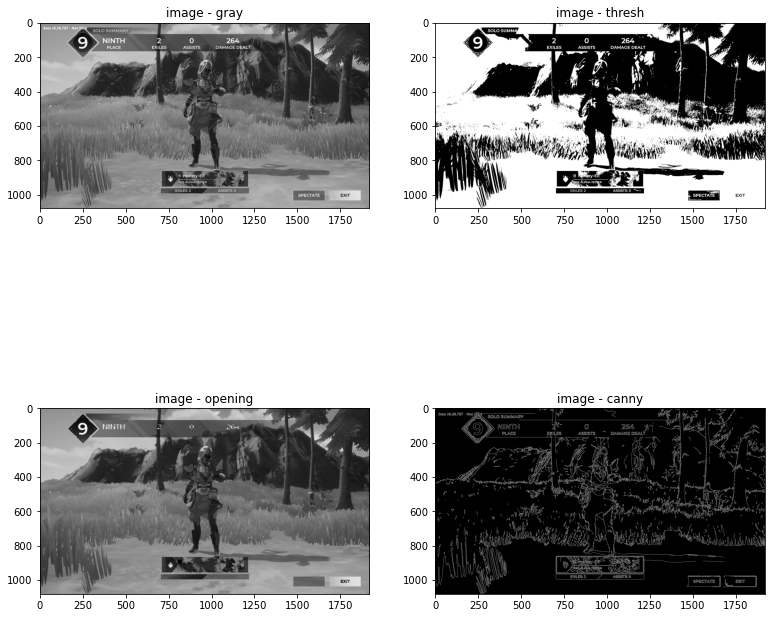

In [6]:
fig = plt.figure(figsize=(13,13))
ax = []

rows = 2
columns = 2
keys = list(images.keys())
for i in range(rows*columns):
    ax.append( fig.add_subplot(rows, columns, i+1) )
    ax[-1].set_title('image - ' + keys[i]) 
    plt.imshow(images[keys[i]], cmap='gray')

In [7]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [8]:
custom_config = r'--oem 3 --psm 6'
print('-----------------------------------------')
print('TESSERACT OUTPUT --> ORIGINAL IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> THRESHOLDED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> OPENED IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))
print('\n-----------------------------------------')
print('TESSERACT OUTPUT --> CANNY EDGE IMAGE')
print('-----------------------------------------')
print(pytesseract.image_to_string(image, config=custom_config))

-----------------------------------------
TESSERACT OUTPUT --> ORIGINAL IMAGE
-----------------------------------------
NINTH y) O 264 a Aer ae Sa
PLACE EXILES ASSISTS DAMAGE DEALT SP
atin da ag W!" 4 ae
| Asia Hi WU yy.
a Z @ "4A 2 ay
(3 ; ae Mg L . ae
| i ay? 7
Wf eee OL
yy YW ON
ZAM 4 “ta lla
ee 7 _ ee PAR 7 . 7 i i
A S y A |
eich iG ) AP HAN '
‘ AE NaN Slat PA ea.
Paar ai 5 si i / Nat
LNW abl \ m i I . f ‘ f i
a ; 4 % NG ‘fl mi a ae fe) i
bu : yy ’ Waki i
/ R
: K\ 4 ~ ; \
\
\
{ a \ :
Ad)
az
@ Paatley-EE 5/22)
¥ Lot Ned Rod
> quscrs ASSISTS: O

-----------------------------------------
TESSERACT OUTPUT --> THRESHOLDED IMAGE
-----------------------------------------
NINTH y) O 264 a Aer ae Sa
PLACE EXILES ASSISTS DAMAGE DEALT SP
atin da ag W!" 4 ae
| Asia Hi WU yy.
a Z @ "4A 2 ay
(3 ; ae Mg L . ae
| i ay? 7
Wf eee OL
yy YW ON
ZAM 4 “ta lla
ee 7 _ ee PAR 7 . 7 i i
A S y A |
eich iG ) AP HAN '
‘ AE NaN Slat PA ea.
Paar ai 5 si i / Nat
LNW abl \ m i I . f ‘ f i
a ; 4 % NG ‘fl mi a ae fe

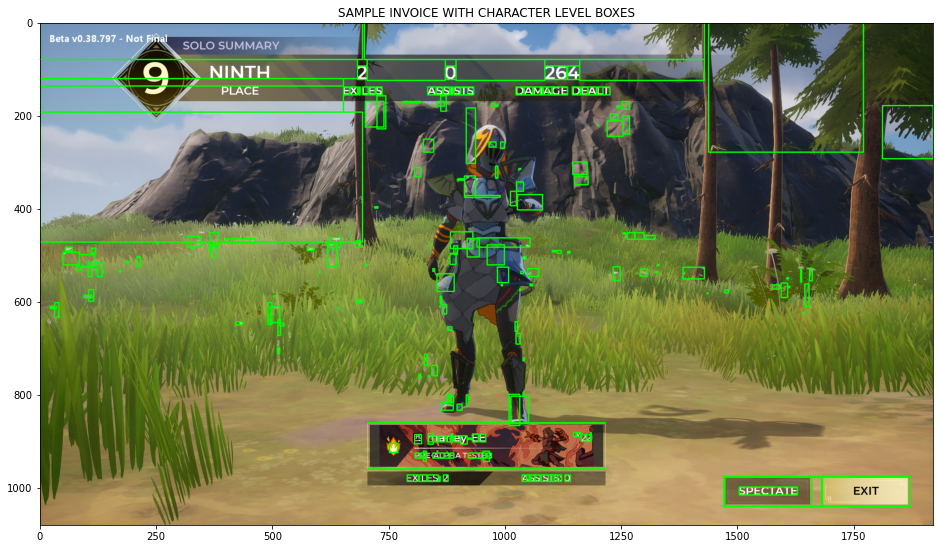

FyeyRon0)y

   

YY A N NINTH y. 0 264
- ww J PLACE EX) LES ASSISTS DAMAGE DEALT

| ta = 7, <7
} i

  

y
f ‘
| fi) Co
| F

mn OMe ml
nt = - ! im
: eer Anes
my Py SP |

io I
= et

a cele Nu = we
> ieee

Soar Vee ants

(1a ts) ESTs)

Se


In [9]:
image = cv2.imread('another.png')
h, w, c = image.shape
boxes = pytesseract.image_to_boxes(image) 
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH CHARACTER LEVEL BOXES')
plt.show()
print(pytesseract.image_to_string(rgb_img))

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


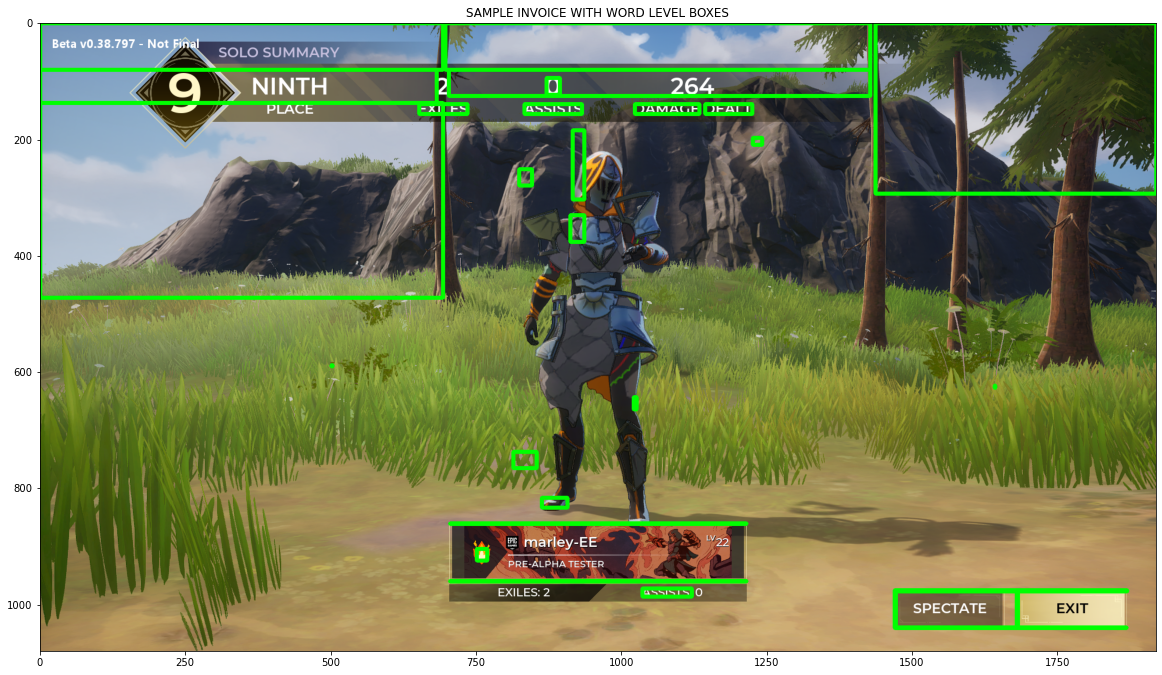

yyy ON NINTH y . 264 iy"
re

PLACE i ASSISTS IAMAGHE SEATT

     
 

a
ve Ie ai 1D)
Bi!
bt |
ji
3
yy \
ow
; '
= nN
@ meatley-EE 22)
Need
Suse) Soe)

a


In [10]:
image = cv2.imread('another.png')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(20,22))
plt.imshow(rgb_img)
plt.title('SAMPLE INVOICE WITH WORD LEVEL BOXES')
plt.show()
print(pytesseract.image_to_string(rgb_img))

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


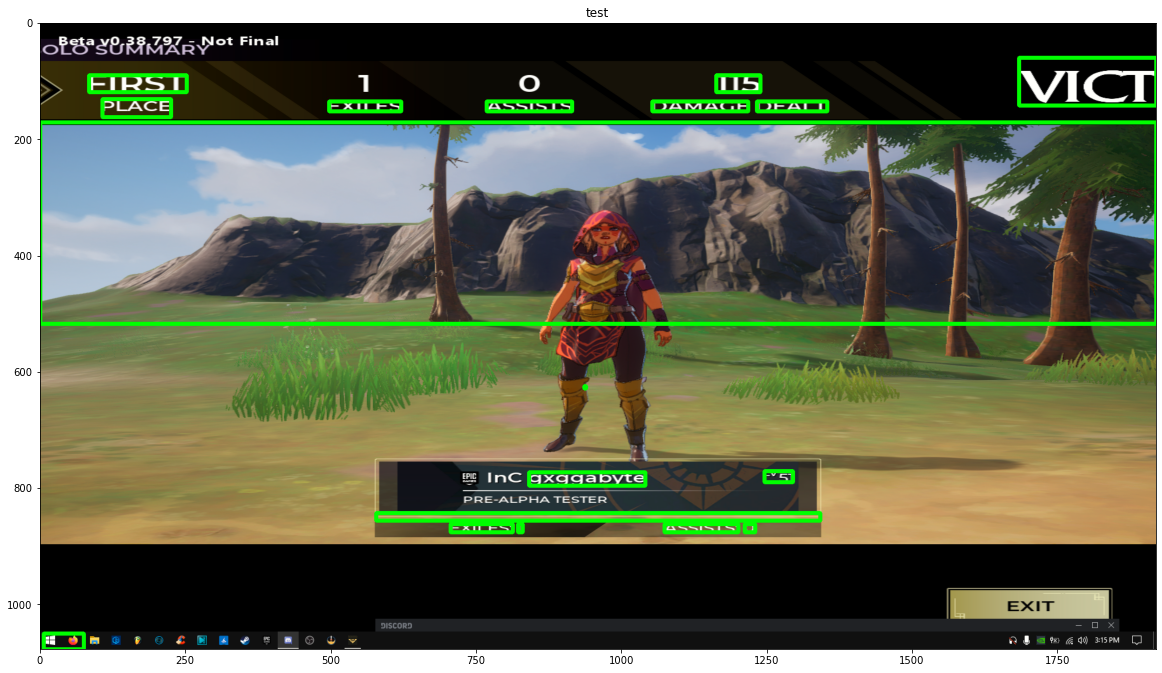

['7.97,', 'oy', 'moeiul', '«|', 'mM', 'AR', 'Vahl', 'Final', 'EIRSTI', '|', 'PLACE', '>.<', 'Asser', 'BYAt', 'wren', 'Biv-4!', 'T', '1', '(Jie', 'y', 'ee', 'eZ', 'Ae', '4', 'ae', '|', '3', 'fk', '“a', 'he', ',', 'i', 'a', '‘', '—', '—', 'aa', 'ge', 'Inc', '|gxqgqabyte', 'ao', 'PRE-ALPHA', 'TESTER', '=', 'assis', 'STE', 'o)', 'Sane', 'oe', 'i', 'a', 'ry', 'Cae', 'im)']


In [26]:
image = cv2.imread('1.png')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('DATA KEYS: \n', d.keys())

n_boxes = len(d['text'])
for i in range(n_boxes):
    # condition to only pick boxes with a confidence > 60%
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])
plt.figure(figsize=(20,22))
plt.imshow(rgb_img)
plt.title('test')
plt.show()
print(pytesseract.image_to_string(rgb_img, lang='eng',config='--psm 12').split())

In [12]:
print('hello')

hello
